# Validate Biomass with Plots

check:  
`code/maap_tools/notebooks/Extract_TCC_from_points_AWS.ipynb` for extraction workflow  
`code/maap_tools/notebooks/examine_siberia_height.ipynb` for well-developed height validation



`ToDo` : check the docs on how to install packages in base R  
conda install -c conda-forge r-plyr r-pathwork

In [ ]:
library(plyr)
library(patchwork)

In [73]:
library(sf)
library(fs)
library(tidyverse)

In [ ]:
library(plyr)

In [23]:
nfi_df = st_read('/projects/my-public-bucket/databank/extract_from_points/nfi_plus_20220603_s3_20240528.gpkg') %>% st_transform(4326)

Reading layer `nfi_plus_20220603_s3_20240528' from data source 
  `/projects/my-public-bucket/databank/extract_from_points/nfi_plus_20220603_s3_20240528.gpkg' 
  using driver `GPKG'
replacing null geometries with empty geometries
Simple feature collection with 990 features and 97 fields (with 3 geometries empty)
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -134.7974 ymin: 42.62224 xmax: -53.43041 ymax: 68.22614
Geodetic CRS:  WGS 84


In [39]:
colnames(nfi_df[ , grepl( "bio" , names( nfi_df ) ) ])

[1] "plotbio_stump"         "plotbio_lgtr_live"     "plotbio_lgtr_dead"    
 [4] "plotbio_smtr_live"     "plotbio_smtr_dead"     "plotbio_shruherb"     
 [7] "plotbio_bryo"          "plotbio_fwd"           "plotbio_swd"          
[10] "plotbio_wd"            "plotbio_roundwd"       "plotbio_oddwd"        
[13] "plotbio_stemwood_live" "plotbio_stembark_live" "plotbio_branches_live"
[16] "plotbio_foliage_live"  "plotbio_stemwood_dead" "plotbio_stembark_dead"
[19] "plotbio_branches_dead" "geom"

In [95]:
# I need a better way of indicating version
VAL_YEAR = 2023
VERSION = 'AGB_H30'
VAR_NAME = 'aboveground woody biomass density [Mg/ha]'
VERSION_NUM = 'v2.0'
VARS_RS = 'ICESat-2 ATL08 v6 | Copernicus GLO30 | HLS H30'
TITLE_MAIN = paste0('Pixel-scale validation of predicted ',VERSION_NUM,' ',VAL_YEAR,' boreal aboveground woody biomass')
#VAL_TYPE = 'value_ht_L30_2020'
VAL_TYPE = paste0('value_',VERSION,'_',VAL_YEAR)
VAL_TYPE

[1] "value_AGB_H30_2023"

#### Clean

In [108]:
VAL_TYPE

[1] "value_AGB_H30_2023"

In [122]:
nfi_df_ = nfi_df %>% 
    separate(meas_date_x, sep='-', into=c('year')) %>%
    dplyr::select(ecozone, year, plotbio_lgtr_live, plotbio_smtr_live, stem_density_standlive, 
                  all_of(VAL_TYPE)
                   #value_esawc2020,  value_standage2020,
                   #value_AGB_L30_2020.v2023.local
          ) %>% 
    mutate(ref_value = case_when(
            is.na(plotbio_lgtr_live) ~ plotbio_smtr_live,
            .default = plotbio_lgtr_live
            )) %>%
    mutate(obs_variable = `VAL_TYPE`) %>%
    mutate(continent = 'North America', source = 'NFI') 

nfi_df_[['obs_value']] <- nfi_df_[[VAL_TYPE]]

Warning message:
“Expected 1 pieces. Additional pieces discarded in 987 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [123]:
head(nfi_df_)

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

,ecozone,year,plotbio_lgtr_live,plotbio_smtr_live,stem_density_standlive,value_AGB_H30_2023,geom,ref_value,obs_variable,continent,source,obs_value
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<POINT [°]>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,Taiga Plains,2006,1.33,5.28,75,11.258359,POINT (-133.2381 68.11971),1.33,value_AGB_H30_2023,North America,NFI,11.258359
2,Taiga Plains,2006,0.00,0.17,0,4.593508,POINT (-129.5118 68.22614),0.00,value_AGB_H30_2023,North America,NFI,4.593508
3,Taiga Plains,2006,0.65,0.40,50,4.459431,POINT (-132.268 67.98007),0.65,value_AGB_H30_2023,North America,NFI,4.459431
4,Taiga Plains,2006,0.61,4.09,33,8.629910,POINT (-133.1436 67.77357),0.61,value_AGB_H30_2023,North America,NFI,8.629910
5,Taiga Plains,2006,0.00,6.16,0,11.648833,POINT (-134.4587 67.54241),0.00,value_AGB_H30_2023,North America,NFI,11.648833
6,Taiga Plains,2006,5.52,2.52,150,7.767642,POINT (-132.1864 67.63305),5.52,value_AGB_H30_2023,North America,NFI,7.767642


In [124]:
nfi_df_$ref_value_alpha = nfi_df_$stem_density_standlive
nfi_df_$group_name = nfi_df_$ecozone

In [125]:
val_plots_df = rbind(#meisner_df_ %>% select(geom, source, continent, group_name, year, ref_ht, ref_ht_alpha, one_of(VAL_TYPE)),  #, value_esawc2020), 
                     #nasa_df_    %>% select(geom, source, continent, group_name, year, ref_ht, ref_ht_alpha, one_of(VAL_TYPE)), #, value_esawc2020),
                     nfi_df_     %>% select(geom, source, continent, group_name, year, ref_value, obs_value, ref_value_alpha, one_of(VAL_TYPE))#, value_esawc2020)
                    #chk_df %>% select(geom, group_name, year, ref_ht, ref_ht_alpha, value_ht_L30_2020, value_esawc2020)
                    ) %>%
                mutate(source = factor(source)) %>%
                # ## Replace NaN with 0 in ref_ht
                # #mutate(ref_ht = ifelse(is.na(ref_ht), 0, ref_ht)) %>% 
                # # Clean pred ht: set neg to NaN, then filter out NaN
                # mutate(!!VAL_TYPE := ifelse(!!VAL_TYPE < 0, -1, !!VAL_TYPE)) %>% 
                # filter(!is.na(ref_value)) %>%
                # filter(!is.na(!!VAL_TYPE)) %>% 
                # # Remove empty geoms
                # filter(!st_is_empty(.)) %>%
                #mutate(diff_value = get(VAL_TYPE) - ref_value) %>% # this needs `plyr`?
                mutate(diff_yr = 2020 - as.numeric(year)) %>% # Need to figure out how to use VAL_YEAR here
                drop_na() # If there are a lot of NA values then you want to go back to your Ht_H30_2020 and see which tiles are missing...


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


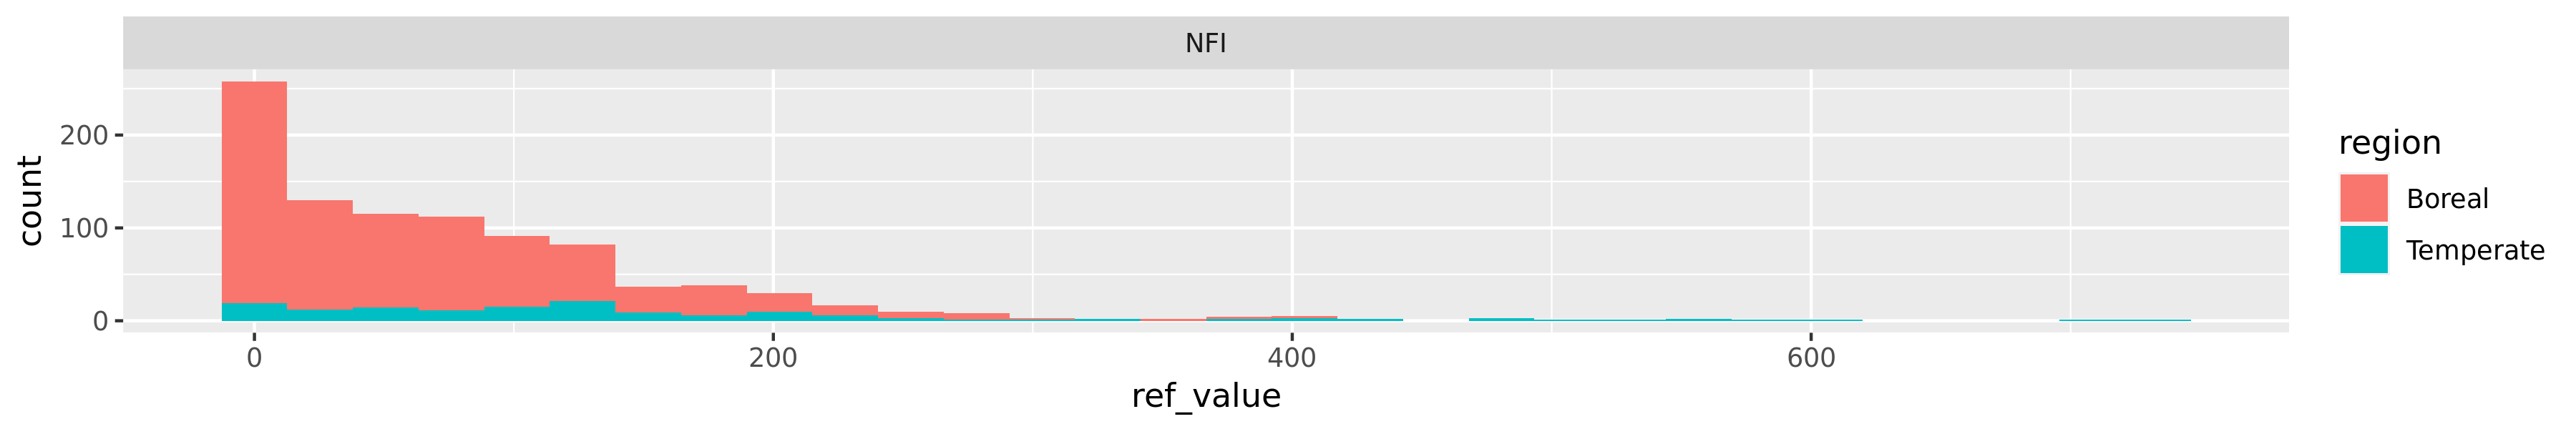

In [126]:
options(repr.plot.width = 12, repr.plot.height = 2)




# Set regions
val_plots_df = val_plots_df %>% 
                mutate(region = case_match(
                                    continent, c('Eurasia') ~ 'Permafrost\nBoreal',
                                               c('North America') ~ 'Boreal'

                ) ) %>%
                mutate(region = case_match( 
                                    group_name, 
                                        c('West Siberian Plains', 'Bahkta River','Tunguska River','Tahe','Russian Far East') ~ 'Boreal', 
                                       # (continent == 'North America' ~ 'Boreal') & (group_name != 'Atlantic Maritime' & group_name != 'Pacific Maritime' & group_name != 'Mixedwood Plains') ~ 'Boreal',
                                        c('Atlantic Maritime','Pacific Maritime','Mixedwood Plains') ~ 'Temperate',
                                    .default = region               
                                  )
                       )

#dim(val_plots_df %>% filter(continent != 'North America'))
#tail(val_plots_df %>% as.data.frame())
#ggplot() + geom_sf(data=ne_countries(scale = 10, returnclass = 'sf')) + geom_sf(data=val_plots_df, aes(color=region), size=1, alpha=0.25) + coord_sf(ylim=c(43.5,72.5))
ggplot() + geom_histogram(data=val_plots_df, aes(x=ref_value, fill=region)) + facet_wrap(source ~., ncol=3)

Warning message:
“Removed 3 rows containing non-finite values (`stat_bin()`).”


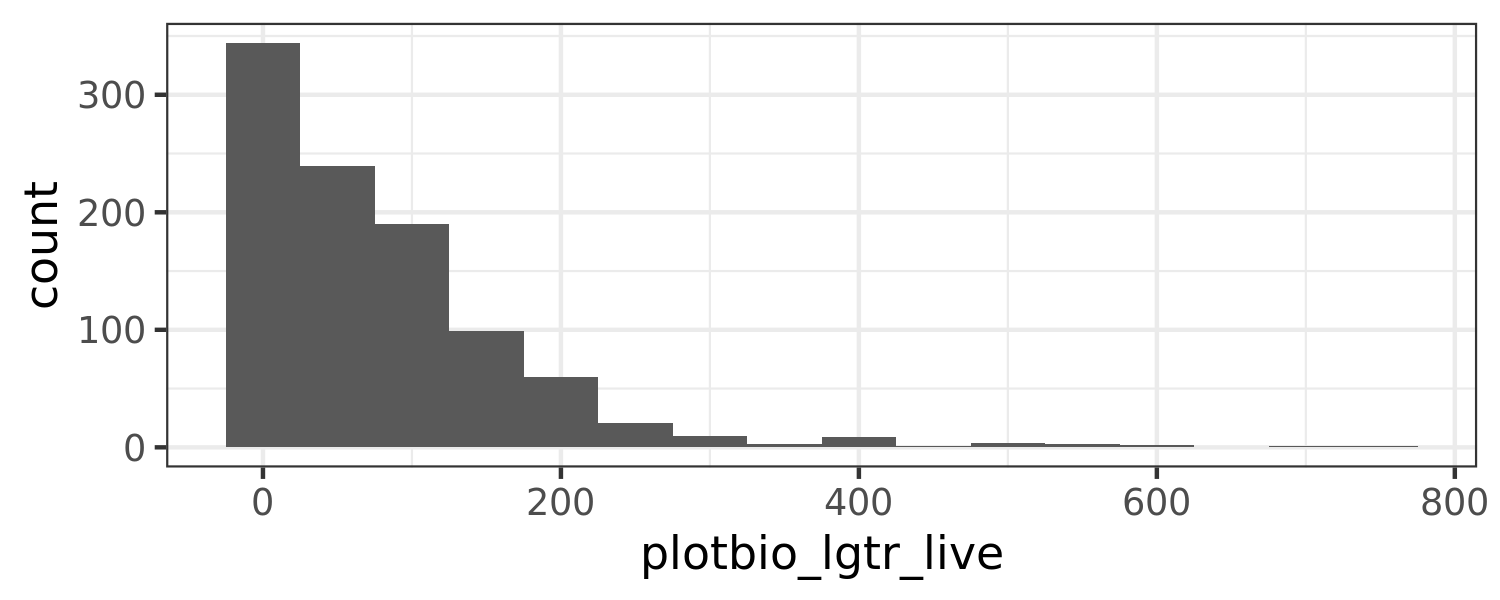

In [101]:
options(repr.plot.width = 5, repr.plot.height = 2)

ggplot(data=nfi_gdf , aes(x=plotbio_lgtr_live)) + geom_histogram(binwidth=50) + theme_bw()

In [102]:
nfi_gdf_sub = nfi_gdf[ , grepl( "value_" , names( nfi_gdf ) ) ]
colnames(nfi_gdf_sub)

[1] "value_esawc2020"    "value_standage2020" "value_tcc2020"     
 [4] "value_ht_H30_2019"  "value_ht_H30_2020"  "value_AGB_H30_2019"
 [7] "value_AGB_H30_2020" "value_AGB_H30_2021" "value_AGB_H30_2022"
[10] "value_AGB_H30_2023" "geom"

## Summarize: apply linear model by year, region, plot group name, and continent

Plot group name is either the field plot group (NASA, Meisner) or an ecozone (NFI)

In [103]:
MAX_DIFF_YR = 15
dim(val_plots_df %>% filter(diff_yr <= MAX_DIFF_YR))

[1] 276  10

In [104]:
df_eq_all <- ddply(val_plots_df %>% 
                            filter(diff_yr <= MAX_DIFF_YR) %>%
                            dplyr::select(one_of(VAL_TYPE), ref_value, year, group_name, region, diff_yr, continent ), .(), c("lm_eqn") )
df_eq_all

ERROR: Error in ddply(val_plots_df %>% filter(diff_yr <= MAX_DIFF_YR) %>% dplyr::select(one_of(VAL_TYPE), : could not find function "ddply"


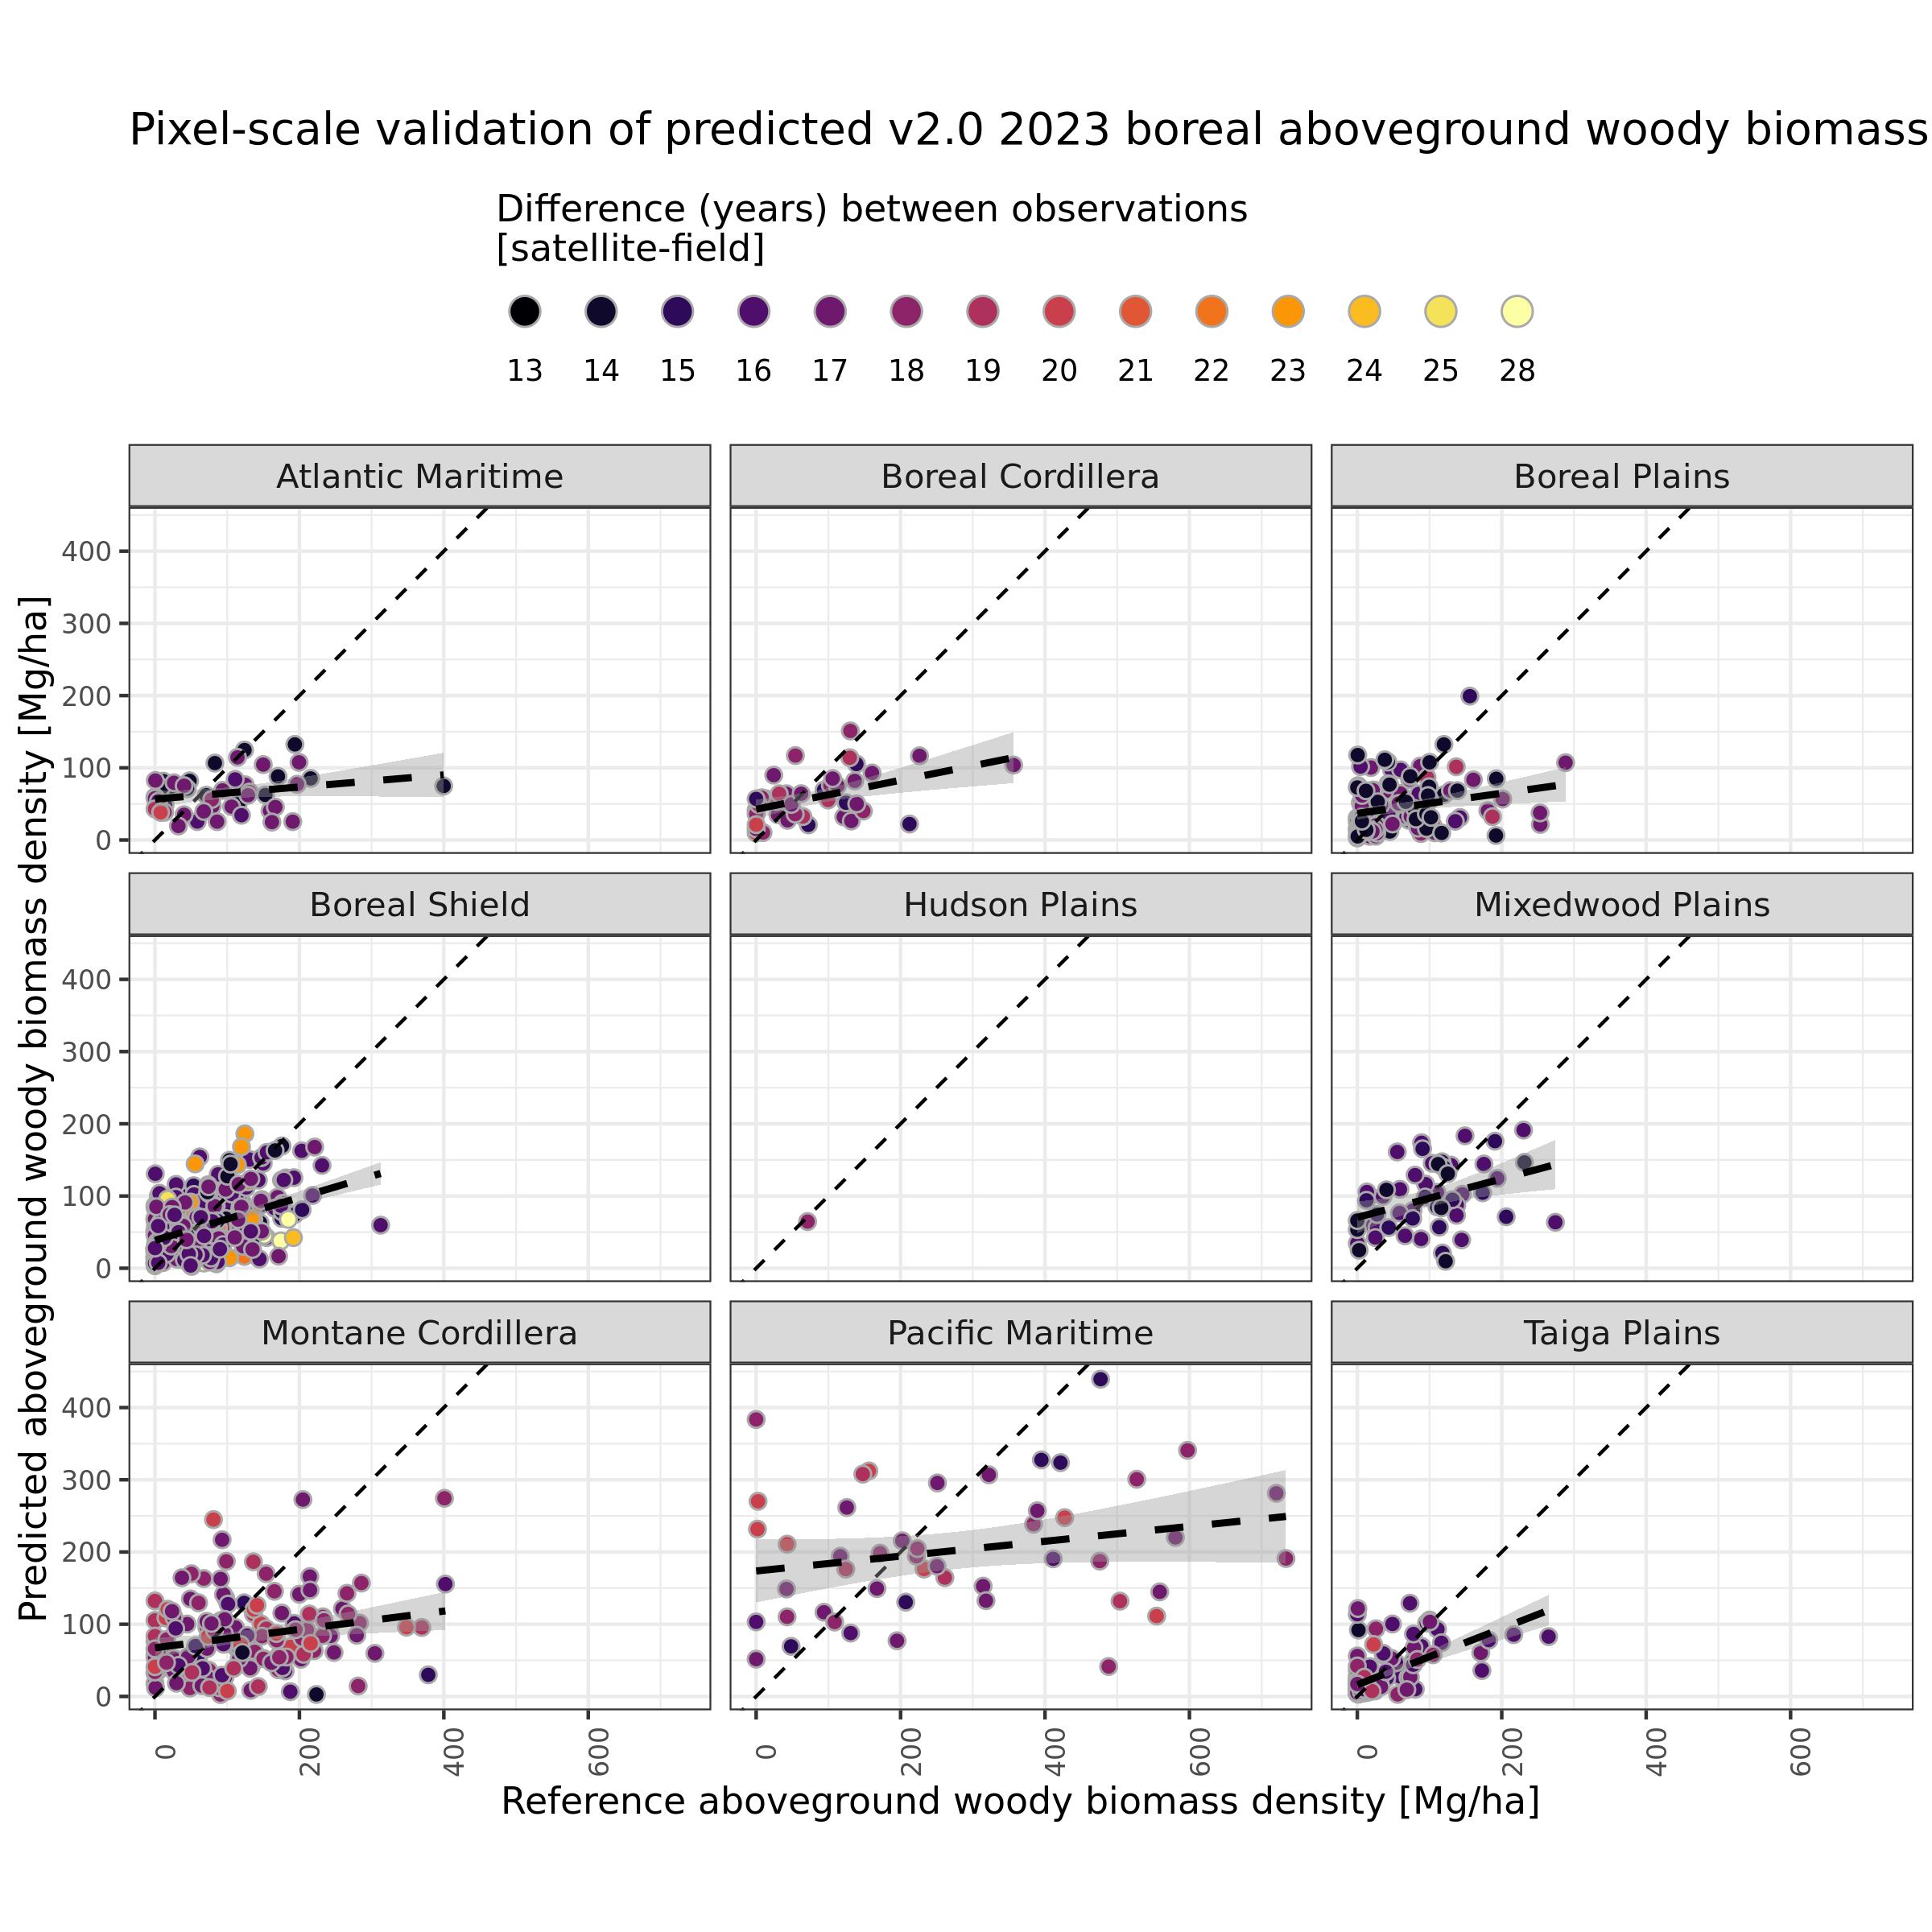

In [128]:
options(repr.plot.width =8, repr.plot.height = 8, repr.plot.res = 300)

valmax = 250

p_scat_all = val_plots_df %>% 
    #filter(diff_yr < MAX_DIFF_YR) %>%
    ggplot(aes(x=as.numeric(ref_value), y=as.numeric(obs_value) )) + 
    geom_point(
        #aes(color=factor(value_esawc2020)), 
        aes(fill=factor(diff_yr)),
        size=2, alpha=1,
        shape=21,
        color='darkgrey'
    ) + 
    #scale_color_manual(values = c("#0072B2","#009E73","#D55E00")) +
    #scale_color_manual(values = col_pal, name='Land Cover Class') +
    scale_fill_viridis_d(option='inferno', name='Difference (years) between observations\n[satellite-field]') +
    geom_abline(linetype='dashed') +
    coord_equal() +
    theme_bw() +
    theme(axis.text.x=element_text(angle=90, size=8), axis.text.y = element_text(size=8), strip.text = element_text(size=7)) + 
    labs(x=paste0('Reference ',VAR_NAME), y =paste0('Predicted ',VAR_NAME), 
         #title='ABoVE Boreal Forest Height c.2020 (gridded, 30m)\nvalidation with boreal forest plots', subtitle='source: ICESat-2, Topography, & HLS L30') +
         #title='ABoVE Boreal Vegetation Height 2020 (gridded, 30m)\nvalidation with boreal forest plots', subtitle=paste0('source: ', VARS_RS)) +
         title=paste0(TITLE_MAIN)) +
    #geom_label(data=df_eq_all, aes(x = 0.1, y = valmax-20,label=paste("RMSE =", rmse, " m", sep='')), parse = FALSE, hjust="inward", vjust="inward", size=3, color = "black", fill="white", label.padding=unit(0.1,"lines"))+
    #geom_label(data=df_eq_all, aes(x = 0.1, y = valmax-60,label=paste("bias =", int, " m", sep='')),  parse = FALSE, hjust="inward", vjust="inward", size=3, color = "black", fill="white", label.padding=unit(0.1,"lines"))+
    #geom_label(data=df_eq_all, aes(x = 0.1, y = valmax-90,label=paste("n =", n, sep='')),             parse = FALSE, hjust="inward", vjust="inward", size=3, color = "black", fill="white", label.padding=unit(0.1,"lines")) +
    guides(fill=guide_legend(override.aes = list(size = 4), title.position = "top", label.position = "bottom", legend.position='horizontal', nrow=1,
                                     #,keywidth = unit(.125, "cm"), keyheight = unit(1, "cm")
                                    )) +
    geom_smooth(method='lm', formula= y~x, color='black', linetype='dashed') +
    theme(legend.position='top', strip.text.x = element_text(size=10)) +
facet_wrap(group_name ~.)

p_scat_all